In [1]:
## APRENDIZAJE SUPERVISADO ##
## Libraries Import #########
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import export_graphviz

In [2]:
#Dataset import
df = pd.read_csv('data.csv')

## Exploratory Data Analysis

In [3]:
target = df['label']

In [4]:
df = df.drop('label', axis=1)

In [5]:
df.describe()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.357394,0.596439,220112.733333,0.594188,0.100245,4.829333,0.203376,-8.509339,0.741333,0.098966,120.405761,3.902667,0.497321
std,0.338405,0.172036,65587.690483,0.253301,0.259921,3.636001,0.177609,5.039488,0.438194,0.104715,28.378116,0.400091,0.239615
min,0.000001,0.107000,33840.000000,0.009250,0.000000,0.000000,0.024000,-29.601000,0.000000,0.023400,55.747000,1.000000,0.033200
25%,0.037150,0.480000,185490.250000,0.423250,0.000000,1.000000,0.094550,-10.173500,0.000000,0.035900,98.998000,4.000000,0.297000
50%,0.244500,0.606000,215108.500000,0.631500,0.000010,5.000000,0.129000,-7.270000,1.000000,0.048750,120.104500,4.000000,0.483000
75%,0.678500,0.715750,244236.750000,0.804750,0.002245,8.000000,0.264750,-5.097750,1.000000,0.113000,138.074750,4.000000,0.684500
max,0.994000,0.986000,675360.000000,0.995000,0.967000,11.000000,0.979000,-0.533000,1.000000,0.721000,204.162000,5.000000,0.975000


In [6]:
df.isnull().sum()

acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [7]:
print(df.shape)

(750, 13)


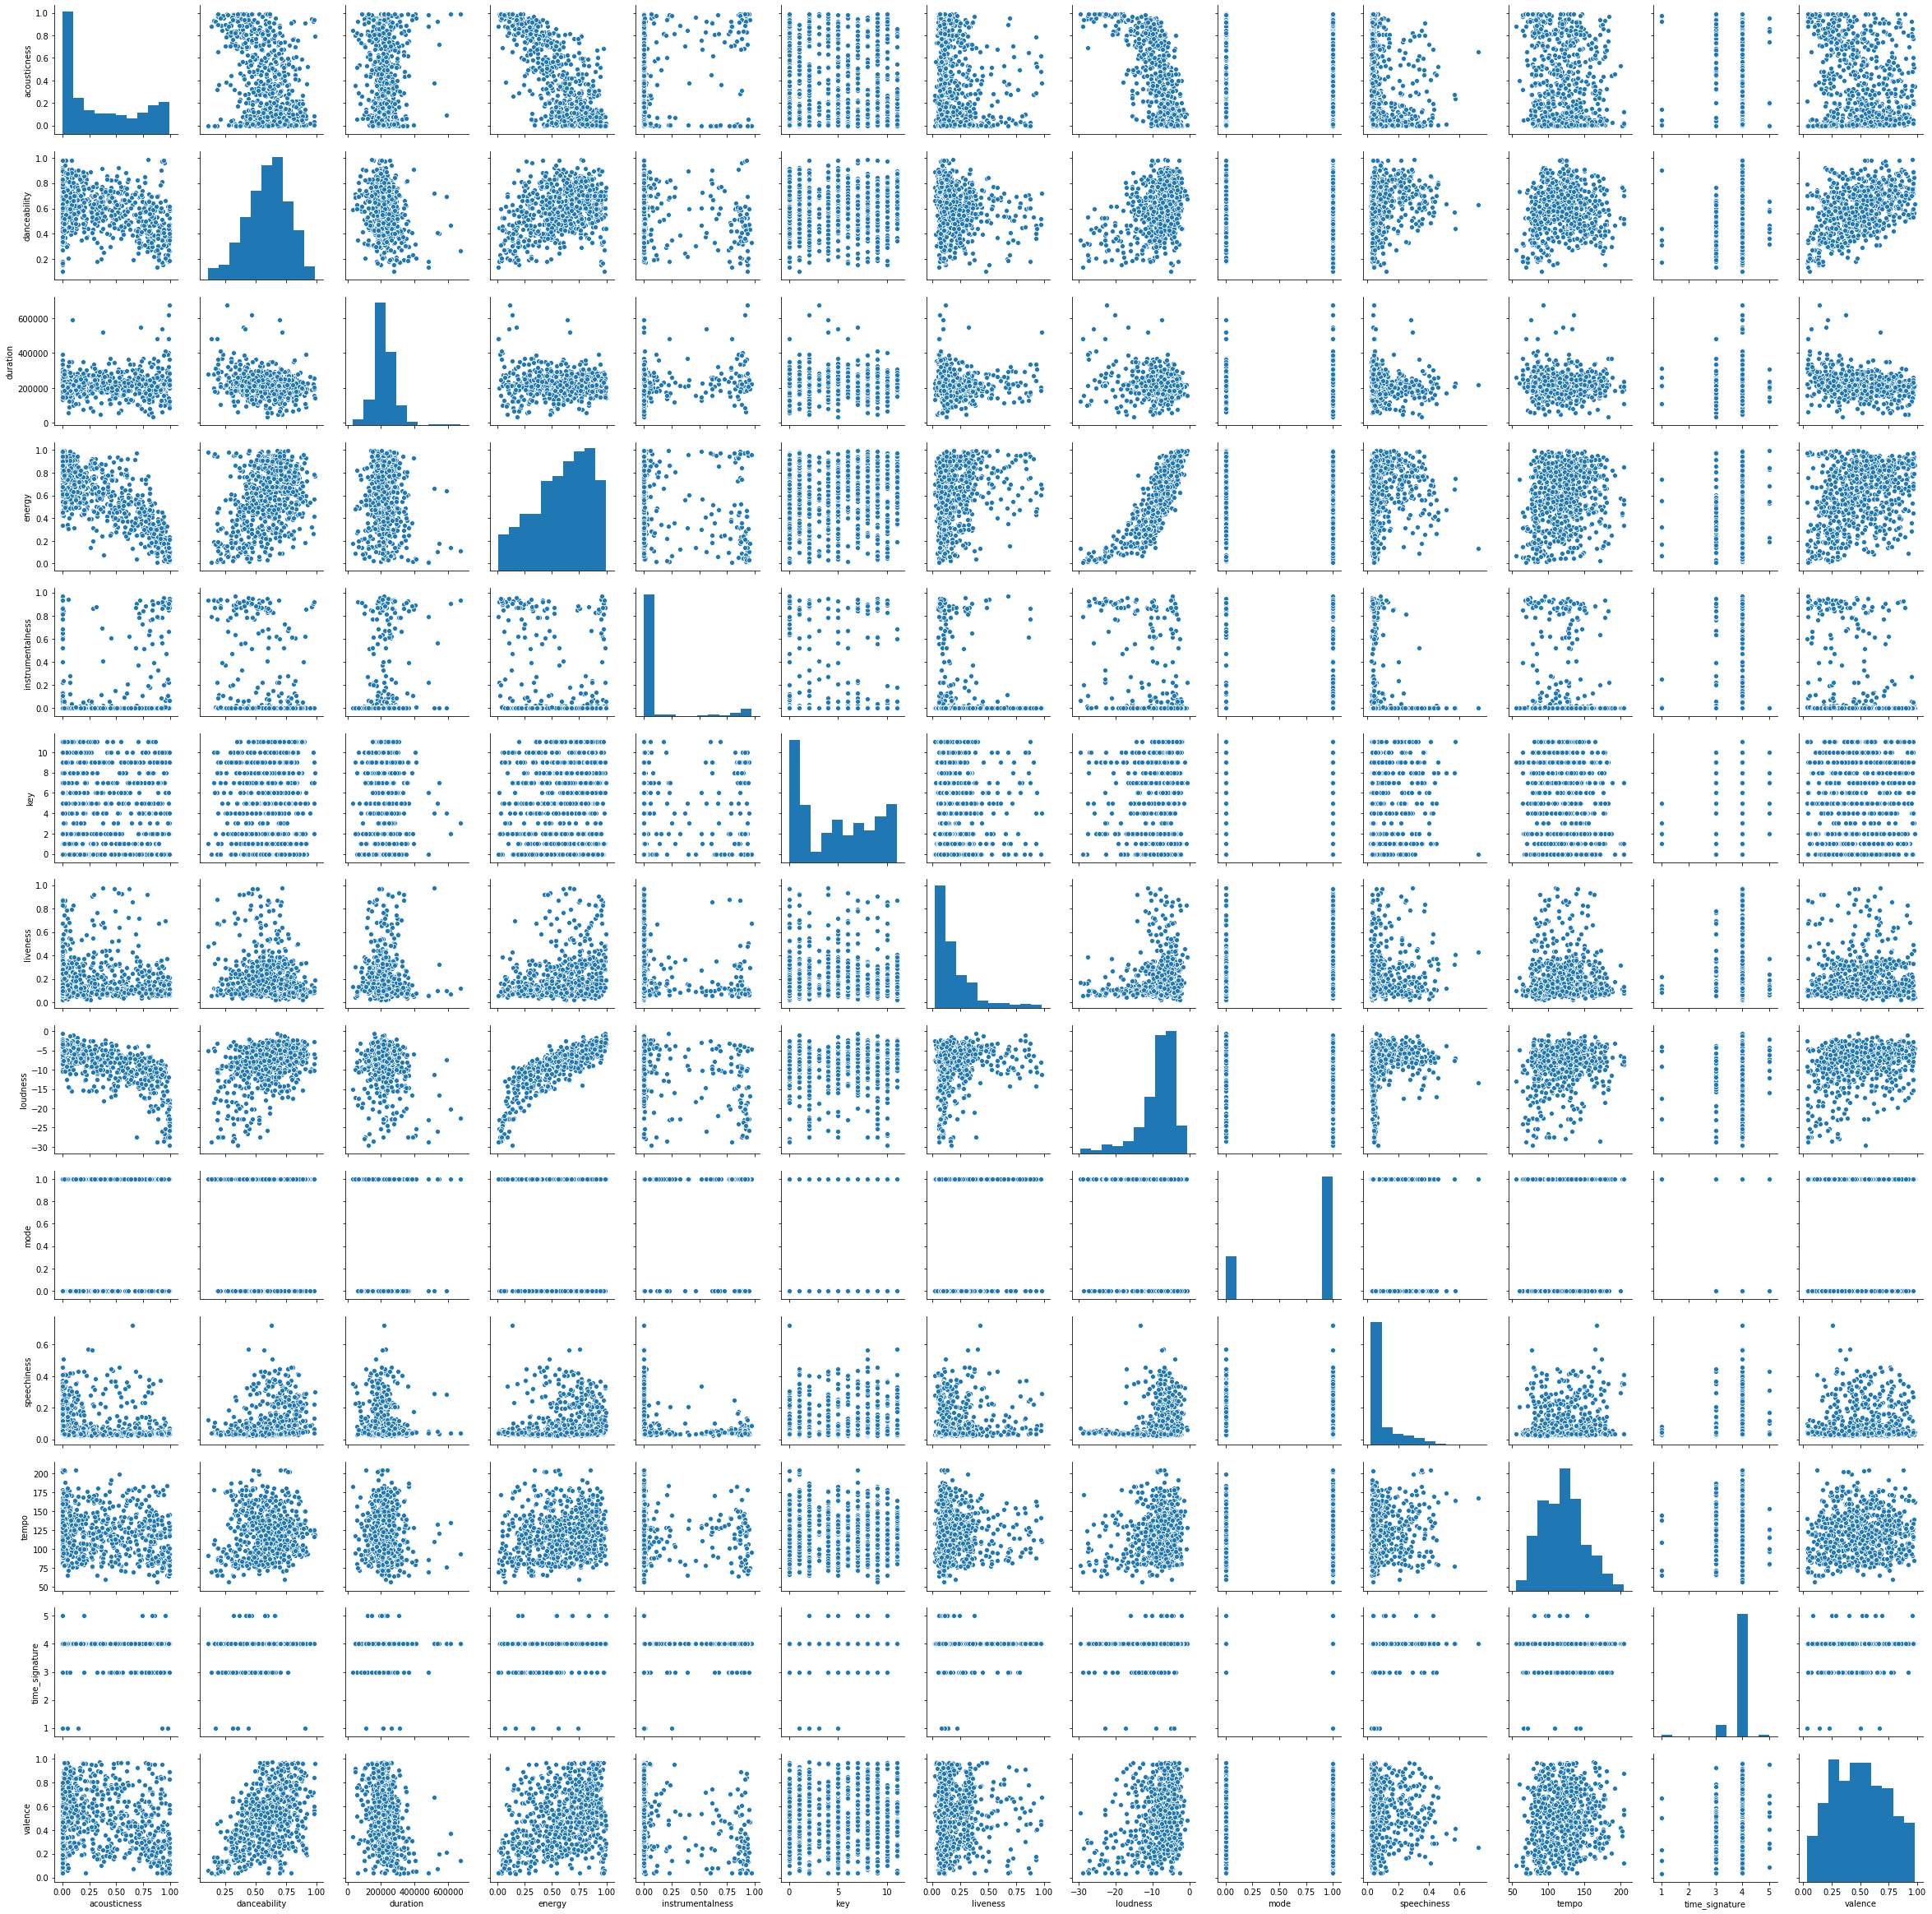

In [8]:
sns.pairplot(df)
plt.show()

## 1. Random Forest Classifier

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(df, target, test_size=0.3, random_state=4)

In [10]:
# Build clf, Random Forest Classifier
clf = RandomForestClassifier(random_state=0,n_estimators=100)

In [11]:
# Parametros para el CrossGrid
max_depth_parameters = np.arange(1,5,1)
#n_estimators_parameters = np.arange(200)

# creo un diccionario "tuned_params" con los parametros que quiero optimizar, e indico que valores de
# ese parametro quiero probar
parameters_clf = [{'max_depth': max_depth_parameters,'max_features':('log2','auto')}]

#indico la cantidad de folds que quiero utilizar en mi training para cross validation
n_folds = 50

#Creo el Clasificador neigh con los paramettros descriptos
classifier_clf = GridSearchCV(clf, parameters_clf, refit = True, cv=n_folds)
#refit = True que este entrenado con el ganador

In [12]:
classifier_clf.fit(xtrain, ytrain)

/Users/ezetalamona/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=50, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'ma

In [13]:
ypred = classifier_clf.predict(xtest)

In [14]:
cm = confusion_matrix(ytest, ypred)
print(cm)

[[ 67  24]
 [ 13 121]]


In [15]:
# Computo el accuracy (comparar ytest vs ypred)
test_acc = accuracy_score(ytest, ypred)
print("El accuracy es " + str(test_acc))
test_recall = recall_score(ytest, ypred, average='macro')
print("El Recall es " + str(test_recall))

El accuracy es 0.8355555555555556
El Recall es 0.819624405445301


In [16]:
classifier_clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [17]:
clf = RandomForestClassifier(random_state=0,bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100)

In [18]:
clf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [19]:
# Función importancia de variables
def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [20]:
var_imp_rf = variable_importance(clf)
importances_rf = var_imp_rf['importance']
indices_rf = var_imp_rf['index']

In [21]:
def print_var_importance(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART model.
    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns
    ----------
    Prints feature importance in descending order
    """
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      names_index[indices[i]],
                      importance[indices[f]]))

In [22]:
names_index = ['acousticness', 'danceability', 'duration', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']

In [23]:
print_var_importance(importances_rf, indices_rf, names_index)

Feature ranking:
1. The feature 'speechiness' has a Mean Decrease in Impurity of 0.28316
2. The feature 'loudness' has a Mean Decrease in Impurity of 0.17049
3. The feature 'acousticness' has a Mean Decrease in Impurity of 0.14696
4. The feature 'energy' has a Mean Decrease in Impurity of 0.13140
5. The feature 'danceability' has a Mean Decrease in Impurity of 0.09615
6. The feature 'duration' has a Mean Decrease in Impurity of 0.03628
7. The feature 'valence' has a Mean Decrease in Impurity of 0.03491
8. The feature 'liveness' has a Mean Decrease in Impurity of 0.03281
9. The feature 'tempo' has a Mean Decrease in Impurity of 0.02709
10. The feature 'instrumentalness' has a Mean Decrease in Impurity of 0.02233
11. The feature 'key' has a Mean Decrease in Impurity of 0.01400
12. The feature 'time_signature' has a Mean Decrease in Impurity of 0.00320
13. The feature 'mode' has a Mean Decrease in Impurity of 0.00123


In [24]:
def variable_importance_plot(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints bar chart detailing variable importance for CART model
    NOTE: feature_space list was created because the bar chart
    was transposed and index would be in incorrect order.

    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns:
    ----------
    Returns variable importance plot in descending order
    """
    index = np.arange(len(names_index))

    importance_desc = sorted(importance)
    feature_space = []
    for i in range(indices.shape[0] - 1, -1, -1):
        feature_space.append(names_index[indices[i]])

    fig, ax = plt.subplots(figsize=(10, 10))

    ax.set_facecolor('#fafafa')
    plt.title('Feature importances for Random Forest Model\
    \nBreast Cancer (Diagnostic)')
    plt.barh(index,
             importance_desc,
             align="center",
             color = '#875FDB')
    plt.yticks(index,
               feature_space)

    plt.ylim(-1, 15)
    plt.xlim(0, max(importance_desc) + 0.01)
    plt.xlabel('Mean Decrease in Impurity')
    plt.ylabel('Feature')

    plt.show()
    plt.close()

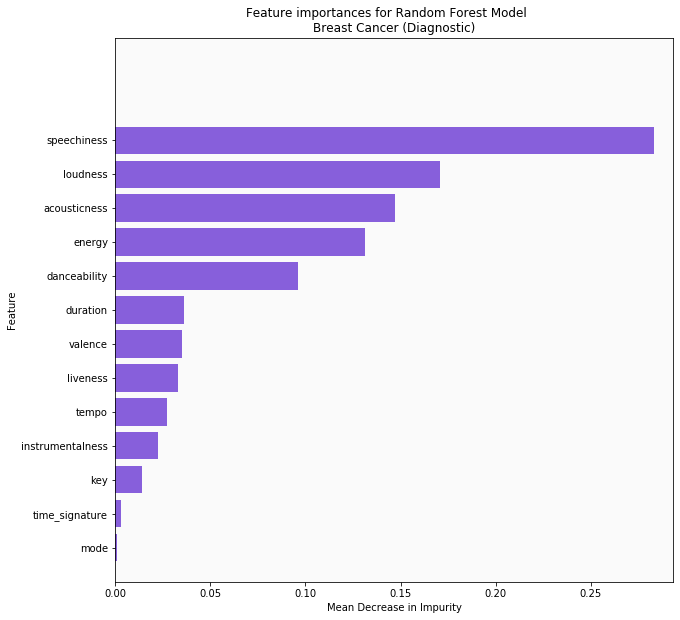

In [25]:
variable_importance_plot(importances_rf, indices_rf, names_index)

## 2. SVM Classifier

### 2. a. SVM Classifier Using the whole dataset

In [26]:
# Train & Test Group generation
xtrain, xtest, ytrain, ytest = train_test_split(df, target, test_size=0.3, random_state=4)

In [27]:
c_svm = svm.SVC()
c_svm.fit(xtrain, ytrain)

/Users/ezetalamona/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [28]:
ypred = c_svm.predict(xtest)

In [29]:
# Computo el accuracy (comparar ytest vs ypred)
test_acc = accuracy_score(ytest, ypred)
print("El accuracy es " + str(test_acc))
test_recall = recall_score(ytest, ypred, average='macro')
print("El Recall es " + str(test_recall))

El accuracy es 0.6088888888888889
El Recall es 0.5164835164835165


### 2. b. SVM Classifier Using the most important features

In [30]:
s_df = df[['speechiness','loudness','acousticness','energy','danceability']]
xtrain, xtest, ytrain, ytest = train_test_split(s_df, target, test_size=0.3, random_state=4)
c_svm = svm.SVC()
c_svm.fit(xtrain, ytrain)
ypred = c_svm.predict(xtest)
# Computo el accuracy (comparar ytest vs ypred)
test_acc = accuracy_score(ytest, ypred)
print("El accuracy es " + str(test_acc))
test_recall = recall_score(ytest, ypred, average='macro')
print("El Recall es " + str(test_recall))


El accuracy es 0.8044444444444444
El Recall es 0.774110218140069


/Users/ezetalamona/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### 2. c. SVM Classifier Using the most important features + CrossGridCV

In [31]:
# Parametros para el CrossGrid
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']} 
#indico la cantidad de folds que quiero utilizar en mi training para cross validation
n_folds = 50

#Creo el Clasificador neigh con los paramettros descriptos
classifier_c_svm = GridSearchCV(c_svm, param_grid, refit = True, cv=n_folds)
#refit = True que este entrenado con el ganador

In [32]:
classifier_c_svm.fit(xtrain, ytrain)

/Users/ezetalamona/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=50, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [33]:
ypred = classifier_c_svm.predict(xtest)

In [34]:
# Computo el accuracy (comparar ytest vs ypred)
test_acc = accuracy_score(ytest, ypred)
print("El accuracy es " + str(test_acc))
test_recall = recall_score(ytest, ypred, average='macro')
print("El Recall es " + str(test_recall))

El accuracy es 0.8444444444444444
El Recall es 0.8235607675906184


## 1. KNN Classification

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(df, target, test_size=0.3, random_state=4)

In [36]:
# defino modelo KNN llamado "neigh"
neigh = KNeighborsClassifier(weights = "distance")

 # creo un array de 5 posiciones con los valores del hiperparametro "k" que quiero probar por gridsearch segmentas en función del primer resultado
parameters_k = np.arange(1,50,1)
parameters_k

# creo un diccionario "tuned_params" con los parametros que quiero optimizar, e indico que valores de
# ese parametro quiero probar
parameters_knn = [{'n_neighbors': parameters_k}]

# indico la cantidad de folds que quiero utilizar en mi training para cross validation
n_folds = 50

#Creo el Clasificador neigh con los paramettros descriptos
classifier_neigh = GridSearchCV(neigh, parameters_knn, refit = True, cv=n_folds)
#refit = True que este entrenado con el ganador

In [37]:
# Ajusto mi modelo a las muestras de training utilizando tanto Xtrain como Ytrain
classifier_neigh.fit(xtrain, ytrain)

/Users/ezetalamona/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=50, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='distance'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [38]:
# Genero predicciones con mi modelo entrenado para las muestras de Test, utilizando solo Xtest
ypred = classifier_neigh.predict(xtest)

In [39]:
#Genero Confusion matrix
cm = confusion_matrix(ytest, ypred)
print(cm)

[[28 63]
 [40 94]]


In [40]:
# Computo el accuracy (comparar ytest vs ypred)
test_acc = accuracy_score(ytest, ypred)
print("El accuracy es " + str(test_acc))
test_recall = recall_score(ytest, ypred, average='macro')
print("El Recall es " + str(test_recall))

El accuracy es 0.5422222222222223
El Recall es 0.5045924225028703


In [41]:
classifier_neigh.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=26, p=2,
                     weights='distance')

### 2. PCA Analysis, Modelling & Testing with KNN Classification

In [42]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [43]:
scaled_df = scaler.transform(df)

In [44]:
print(scaled_df.std())
print(scaled_df.mean())

1.0
1.8765615841869312e-17


In [45]:
pca=PCA(n_components=2)

In [46]:
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [47]:
x_pca=pca.transform(scaled_df)

In [48]:
scaled_df.shape

(750, 13)

In [49]:
x_pca.shape

(750, 2)

Text(0, 0.5, 'Second principle component')

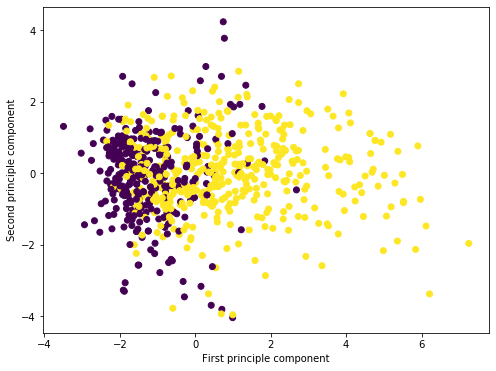

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=target)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [51]:
x_pca.std()

1.5577055079312132

#### 2. a. Modelling with KNN (PCA)

In [52]:
xtrain, xtest, ytrain, ytest = train_test_split(x_pca, target, test_size=0.3, random_state=4)

In [53]:
# defino modelo KNN llamado "neigh"
neigh = KNeighborsClassifier(weights = "distance")

In [54]:
 # creo un array de 5 posiciones con los valores del hiperparametro "k" que quiero probar por gridsearch segmentas en función del primer resultado
parameters_k = np.arange(1,50,1)
parameters_k

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [55]:
# creo un diccionario "tuned_params" con los parametros que quiero optimizar, e indico que valores de
# ese parametro quiero probar
parameters_knn = [{'n_neighbors': parameters_k}]

In [56]:
# indico la cantidad de folds que quiero utilizar en mi training para cross validation
n_folds = 50

In [57]:
#Creo el Clasificador neigh con los paramettros descriptos
classifier_neigh = GridSearchCV(neigh, parameters_knn, refit = True, cv=n_folds)
#refit = True que este entrenado con el ganador

In [58]:
# Ajusto mi modelo a las muestras de training utilizando tanto Xtrain como Ytrain
classifier_neigh.fit(xtrain, ytrain)

/Users/ezetalamona/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=50, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='distance'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

#### 2. b. Testing del modelo (PCA)

In [59]:
# Genero predicciones con mi modelo entrenado para las muestras de Test, utilizando solo Xtest
ypred = classifier_neigh.predict(xtest)

In [60]:
# Computo el accuracy (comparar ytest vs ypred)
test_acc = accuracy_score(ytest, ypred)
print("El accuracy es " + str(test_acc))

El accuracy es 0.7733333333333333


In [61]:
# Computo el recall (comparar ytest vs ypred)
test_recall = recall_score(ytest, ypred, average='macro')
print("El Recall es " + str(test_recall))

El Recall es 0.7585697884205347


In [62]:
# Compute and plot AUC
fpr1, tpr1, thresholds = roc_curve(ytest, ypred, pos_label=1)
auc = metrics.auc(fpr1, tpr1)
print("El AUC es = " + str(auc))

El AUC es = 0.7585697884205347


In [63]:
#Genero Confusion matrix
cm = confusion_matrix(ytest, ypred)
print(cm)

[[ 62  29]
 [ 22 112]]


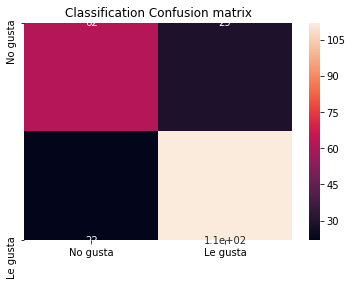

In [64]:
df_cm = pd.DataFrame(cm, index = ['No gusta', 'Le gusta'], columns = ['No gusta', 'Le gusta'])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True)
plt.title('Classification Confusion matrix')
plt.show()